# A simple 2D elastic wave propagator

In this tutorial, we chose the problem of solving a Partial Differential Equation (PDE), using a finite-difference method, to illustrate the essential elements using Python. We used the same models as in https://software.intel.com/en-us/articles/code-sample-two-dimensional-finite-difference-wave-propagation-in-isotropic-media-iso2dfd

Many physical phenomena can be described by PDEs. One example is the wave equation, which describes waves propagating through a medium with specific characteristics (for example, isotropic or anisotropic, constant or variable density, and so on).

Finite-difference methods are used to approximate the solution of PDEs by approximating the continuous PDEs by a set of discrete difference equations, which can be solved iteratively in a computer.
This is useful in several disciplines, including earthquake and oil exploration seismology, ocean acoustics, radar imaging, nondestructive evaluation, and others.[1]

## Problem Statement

If the medium is acoustic and its density is constant, the wave equation (PDE describing wave propagation in the medium) is:
 $$\frac{\partial^2 u}{\Delta t^2} = v^2 (\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2})$$,

where $p$ is the pressure, $v$ is the medium velocity (velocity at which acoustic waves propagate in the medium), $x$ and $y$ are the two Cartesian coordinates, and $t$ is the time. The wave can be initiated using initial conditions, defined by $p$ at $t=0$, or using an explicit source function $s(x,y)$. This code sample uses an explicit source function.

To obtain an approximate solution to this problem, we divide the model into a grid of $N$ by $N$ points (for simplicity we use a square grid, but a rectangular grid can be used). If we call $∆x$, ∆y the distance between points in the grid in the $x$ and $y$ axes, respectively, and if $∆t$ is the increment in time (where time iterations range from $n=0$ to a defined maximum number of iterations), then by approximating the continuous partial derivatives using 2nd order central differences, we obtain the discretized equation:
        $$\frac{p_{i,j}^{n+1}-2p_{i,j}^{n}+p_{i,j}^{n-1}}{\Delta t^2} = v^2 \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + v^2 \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} $$,

And solving for $u$ (the value of the pressure wavefield at position $i,j$ at time $n+1$), we can now describe a finite-difference formula to approximate the solution of the 2D acoustic wave equation:
        $$ p_{i,j}^{n+1} = 2p_{i,j}^{n}-p_{i,j}^{n-1} + {\Delta t^2} 
        \times v^2 ( \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + 
        \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2})$$,

This is an explicit formula for the values of the pressure wavefield at time $n+1$ (at every point in the grid) based on the values of the pressure wavefield at time $n$ and $n-1$.

Condicao inicial: 


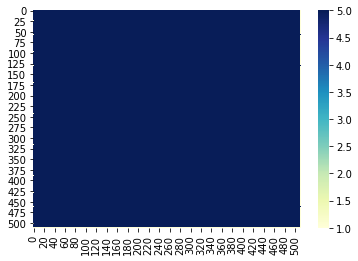

In [1]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy
import time
from matplotlib import pyplot, cm
%matplotlib inline

# vamos criar o grid 2D 
nx = 512
ny = 512
nt = 1000    # numero de timesteps
print_every = 25
c = 1.5       # velocidade da onda (igual em todo o dominio)
#dx = 2 / (nx - 1)
#dy = 2 / (ny - 1)
dx = 15.0
dy = 15.0
sigma = .2
#dt = sigma * dx    # condição de estabilidade: dt < dx / 5
dt =  2.624453295839119

#cria eixos do grafico
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

# por ser uma eq de segunda ordem no tempo, precisaremos de 3 copias da matriz
u_next = numpy.ones((ny, nx)) ##create a nx x ny for next value
u_val  = numpy.ones((ny, nx)) ##                ... for the actuar value
u_prev = numpy.ones((ny, nx)) ##                ... for the previous value

### Faz as condicoes iniciais 

#u_val[40,40]=2  # um ponto de pressão = 2 no centro do dominio

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
##u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
#u_next[int(.5 / dy):int((.5+dy) / dy + 1),int(.5 / dx):int((.5+dx) / dx + 1)] = 2 
# ***
u_next[int(dx/2):int(dx/2 + 3),int(dy/2):int(dy/2 + 3)] = 5 
for i in range(1, nx-1):
    for j in range(1, ny-1):
        u_next[i,j]=5
      

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
#fig = pyplot.figure(figsize=(11, 7), dpi=100)
#ax = fig.gca(projection='3d')                      
#X, Y = numpy.meshgrid(x, y)
#surf = ax.plot_surface(X, Y, u_next[:], cmap=cm.viridis)


import seaborn as sns
import matplotlib.pylab as plt

#u_next = numpy.ones((ny, nx))
print("Condicao inicial: ")
ax = sns.heatmap(u_next, cmap="YlGnBu")
plt.show()

### First implementation - Nested loops

Our first implementation uses nested loops operating on the three arrays. In this implementation, each element $p^{n+1}_{i,j}$ is calculated as a function of its neighbors as illustrated in the following. This is called a stencil pattern. 

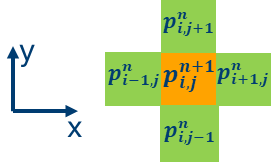

Stencil codes follow a regular pattern for the calculation of vector elements. This example os a 4-th order stencil (i.e., each element is a function of 4 neigbors). 

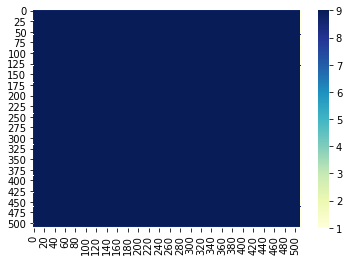

 *** timestep   n = 0


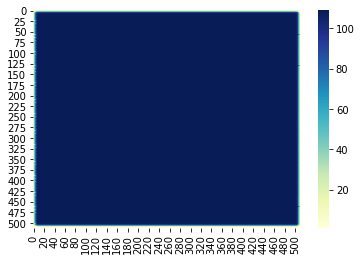

 *** timestep   n = 25


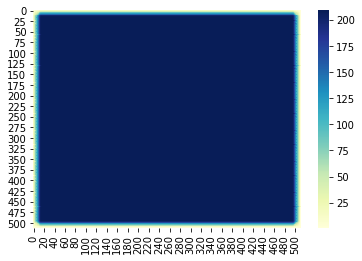

 *** timestep   n = 50


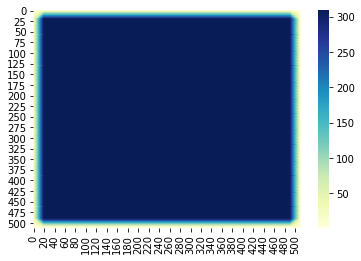

 *** timestep   n = 75


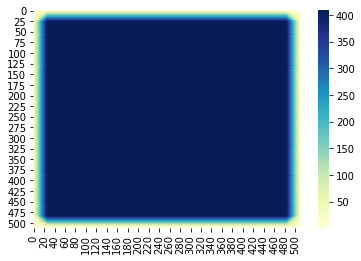

 *** timestep   n = 100


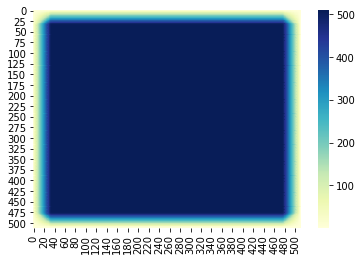

 *** timestep   n = 125


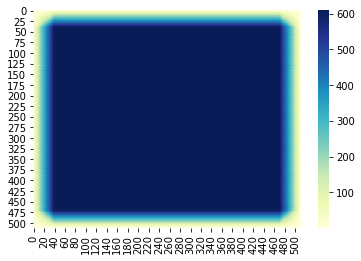

 *** timestep   n = 150


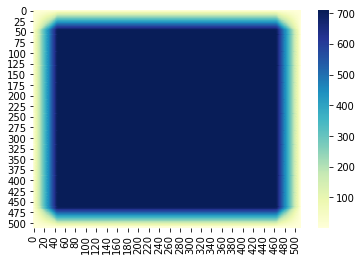

 *** timestep   n = 175


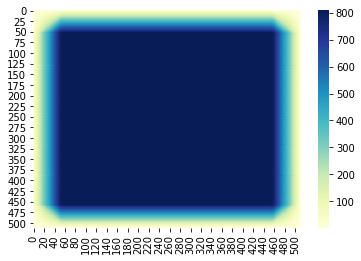

 *** timestep   n = 200


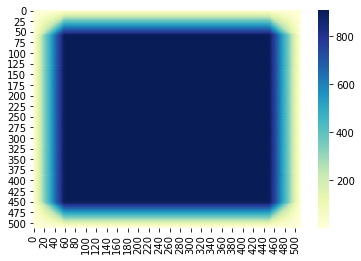

 *** timestep   n = 225


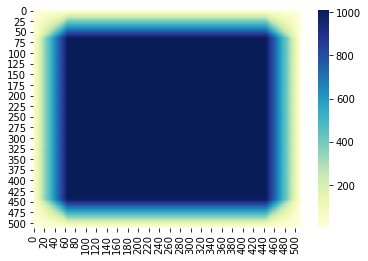

 *** timestep   n = 250


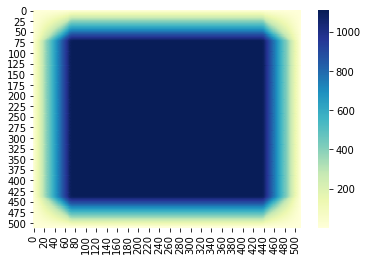

 *** timestep   n = 275


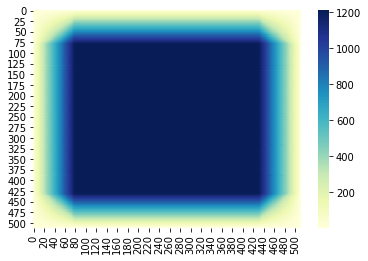

 *** timestep   n = 300


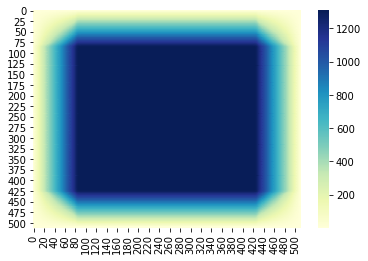

 *** timestep   n = 325


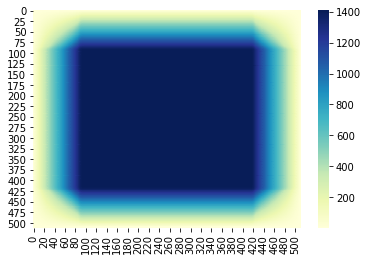

 *** timestep   n = 350


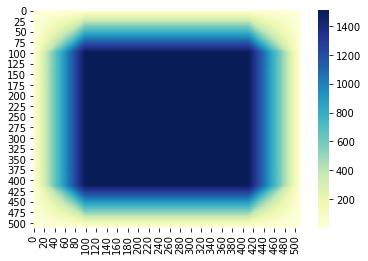

 *** timestep   n = 375


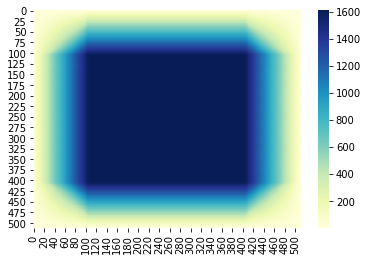

 *** timestep   n = 400


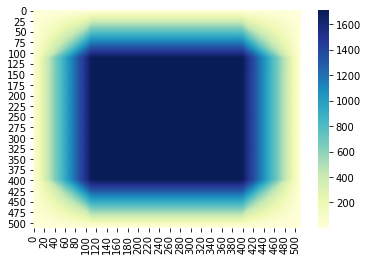

 *** timestep   n = 425


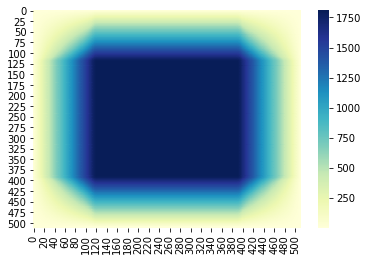

 *** timestep   n = 450


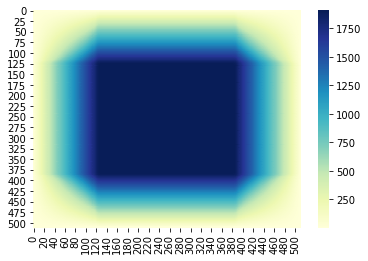

 *** timestep   n = 475


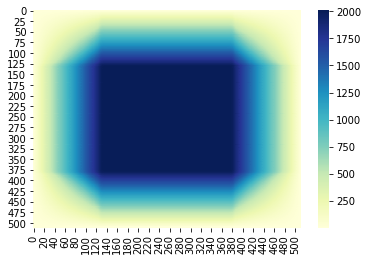

 *** timestep   n = 500


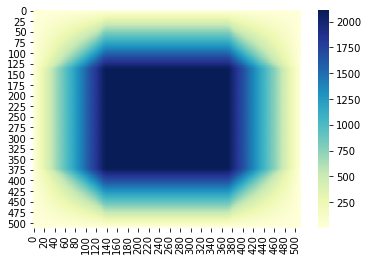

 *** timestep   n = 525


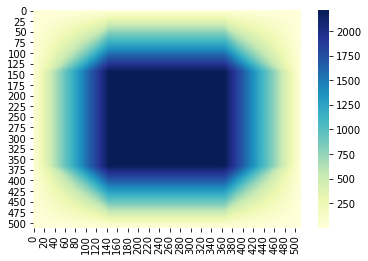

 *** timestep   n = 550


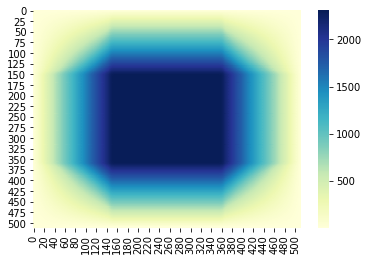

 *** timestep   n = 575


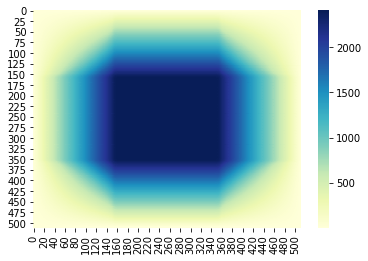

 *** timestep   n = 600


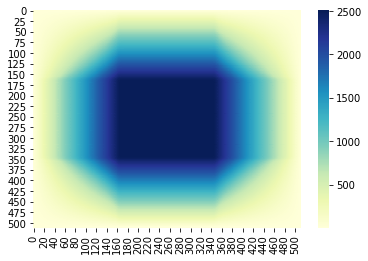

 *** timestep   n = 625


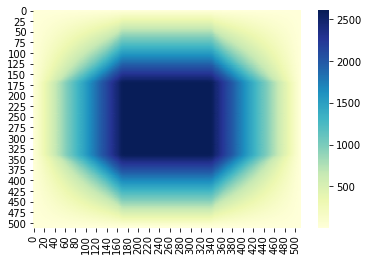

 *** timestep   n = 650


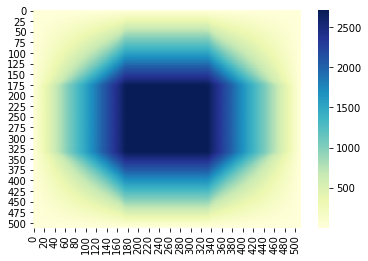

 *** timestep   n = 675


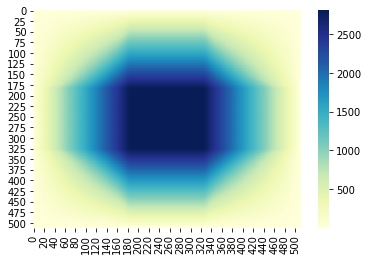

 *** timestep   n = 700


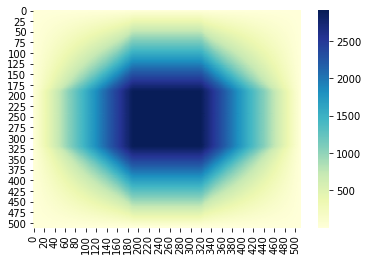

 *** timestep   n = 725


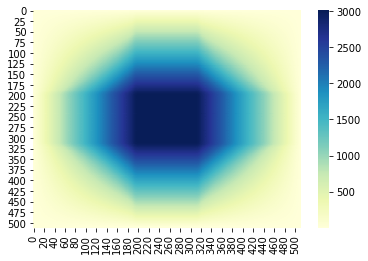

 *** timestep   n = 750


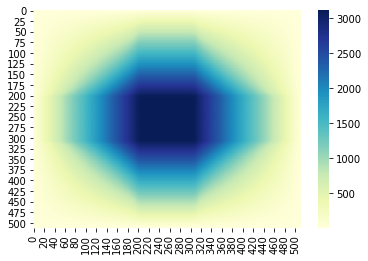

 *** timestep   n = 775


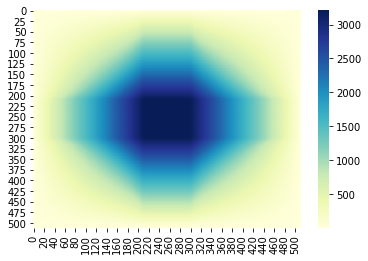

 *** timestep   n = 800


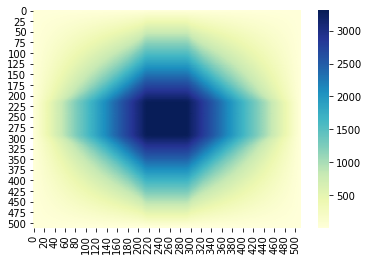

 *** timestep   n = 825


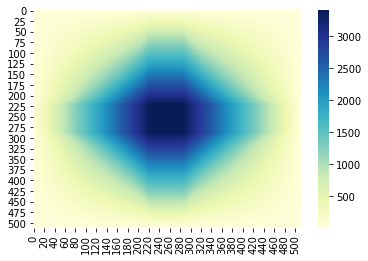

 *** timestep   n = 850


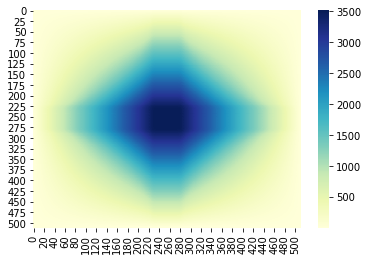

 *** timestep   n = 875


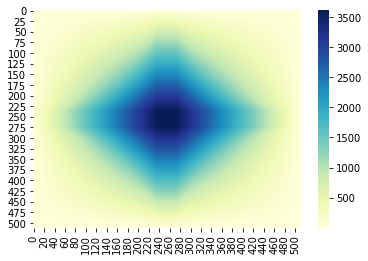

 *** timestep   n = 900


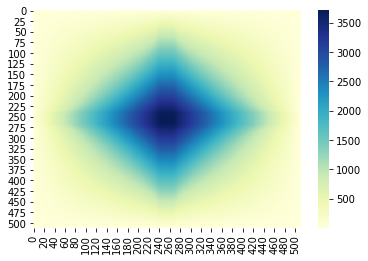

 *** timestep   n = 925


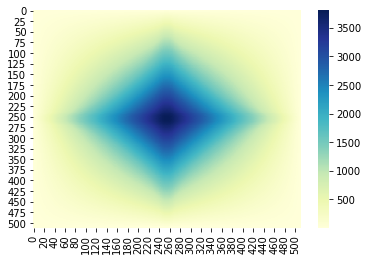

 *** timestep   n = 950


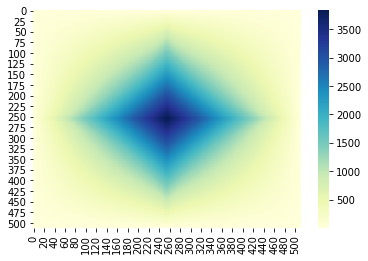

 *** timestep   n = 975
elapsed time (3 arrays + nested loops) 1110.8761155605316


In [2]:
t1 = time.time()
# loop no tempo 
for n in range(nt):
    u_prev = u_val.copy()
    u_val = u_next.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            value = 0.0
            #value += prev[gid + 1] - 2.0 * prev[gid] + prev[gid - 1];
            value += (u_val[i+1,j] - 2 * u_val[i,j] + u_val[i-1,j])/(dx * dx)
            #value += prev[gid + nCols] - 2.0 * prev[gid] + prev[gid - nCols];
            value += (u_val[i,j+1] - 2 * u_val[i,j] + u_val[i,j-1])/(dy * dy)
            #value *= dtDIVdxy * vel[gid];
            #value *= dt * dt * c * c
            value *= dt * dt * c * c
            # next[gid] = 2.0f * prev[gid] - next[gid] + value;
            u_next[i,j] = 2 * u_val[i,j] - u_prev[i,j] + value
    if (n % print_every)==0:
        ax = sns.heatmap(u_next, cmap="YlGnBu")
        plt.show()
        #fig = pyplot.figure(figsize=(11, 7), dpi=100)
        #ax = fig.gca(projection='3d')
        #X, Y = numpy.meshgrid(x, y)
        print(' *** timestep   n = '+str(n))
        #surf = ax.plot_surface(X, Y, u_next[:], cmap=cm.viridis)

            
print('elapsed time (3 arrays + nested loops) '+str(time.time()-t1))

# Segunda maneira - tentativa com numpy

Usa dois vetores, fazendo a troca no final do loop do tempo.



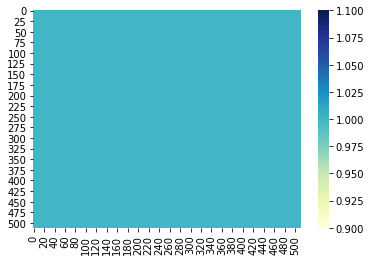

In [3]:
# por ser uma eq de segunda ordem no tempo, precisaremos de 3 copias da matriz
u_next = numpy.ones((ny, nx)) ##create a nx x ny for next value
u_val  = numpy.ones((ny, nx)) ##                ... for the actuar value
u_prev = numpy.ones((ny, nx)) ##                ... for the previous value
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
#u_next[int(.5 / dy):int((.5+dy) / dy + 1),int(.5 / dx):int((.5+dx) / dx + 1)] = 2 
# ***
u_next[int(.5 / dy):int(.55 / dy),int(.5 / dx):int(.55 / dx)] = 2 


ax = sns.heatmap(u_next, cmap="YlGnBu")
plt.show()

#fig = pyplot.figure(figsize=(11, 7), dpi=100)
#ax = fig.gca(projection='3d')                      
#X, Y = numpy.meshgrid(x, y)                            
#surf = ax.plot_surface(X, Y, u_next[:], cmap=cm.viridis)

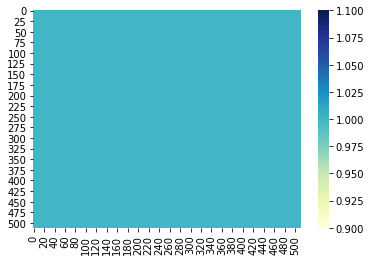

 **  timestep n = 0


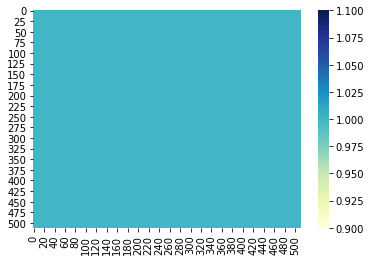

 **  timestep n = 25


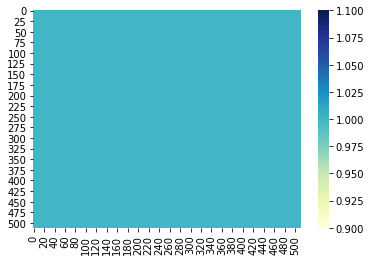

 **  timestep n = 50


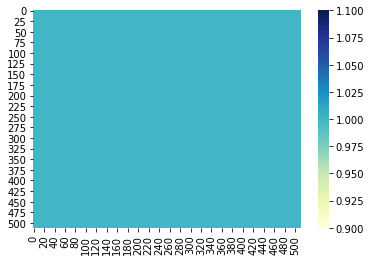

 **  timestep n = 75


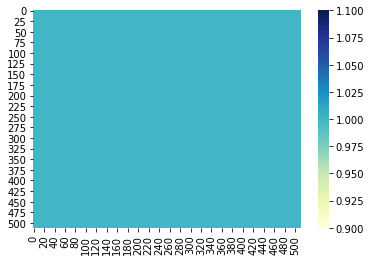

 **  timestep n = 100


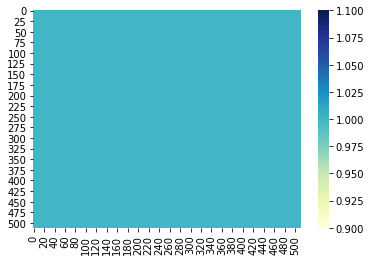

 **  timestep n = 125


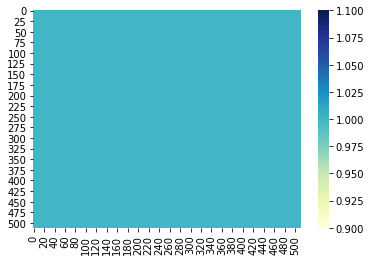

 **  timestep n = 150


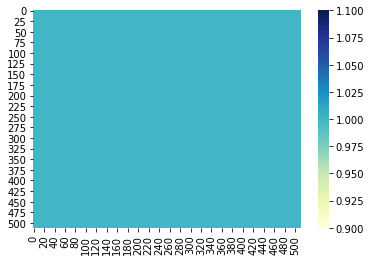

 **  timestep n = 175


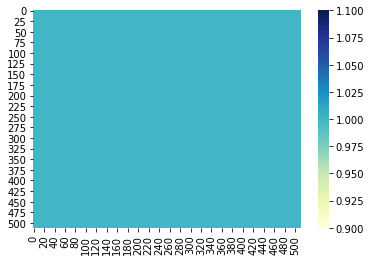

 **  timestep n = 200


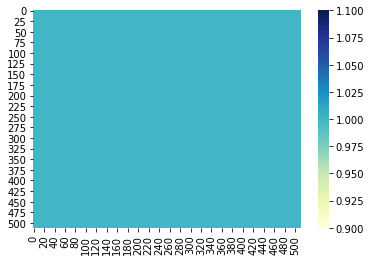

 **  timestep n = 225


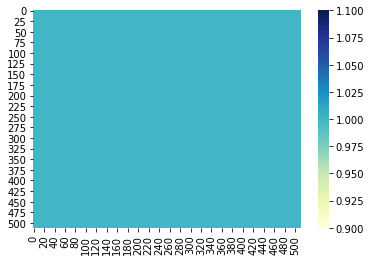

 **  timestep n = 250


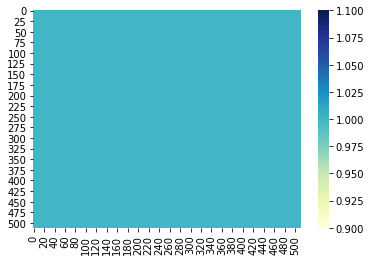

 **  timestep n = 275


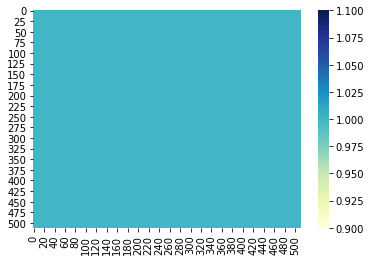

 **  timestep n = 300


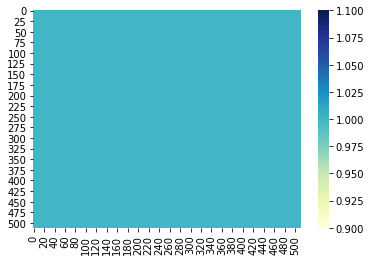

 **  timestep n = 325


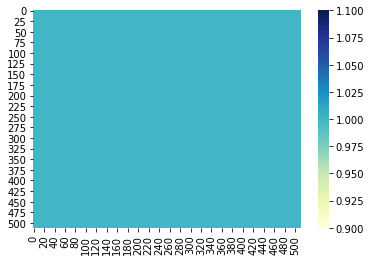

 **  timestep n = 350


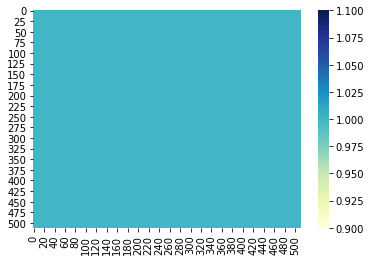

 **  timestep n = 375


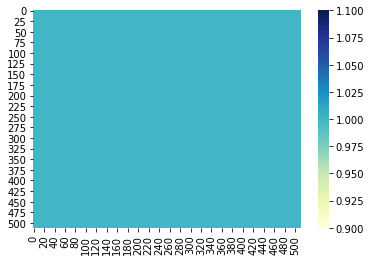

 **  timestep n = 400


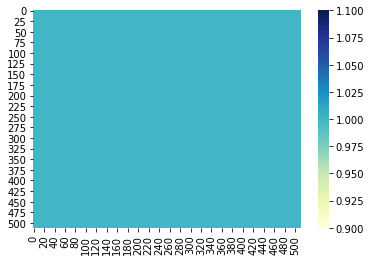

 **  timestep n = 425


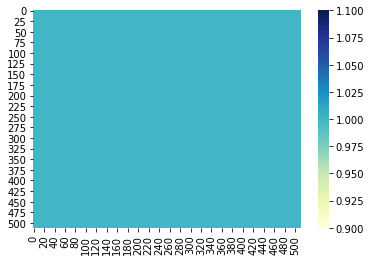

 **  timestep n = 450


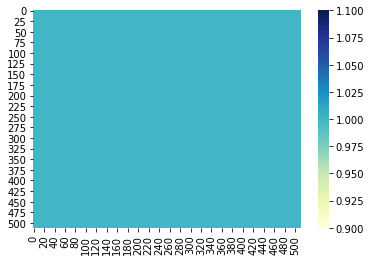

 **  timestep n = 475


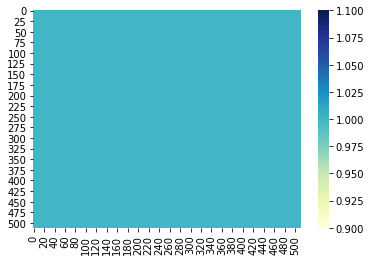

 **  timestep n = 500


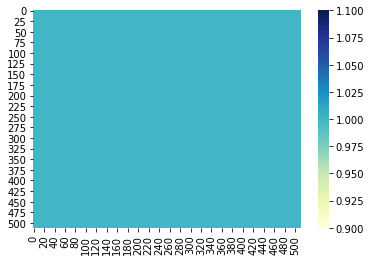

 **  timestep n = 525


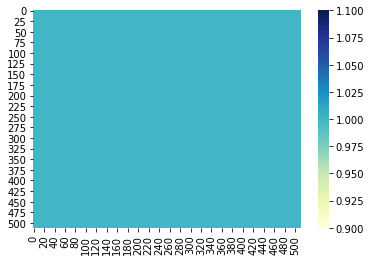

 **  timestep n = 550


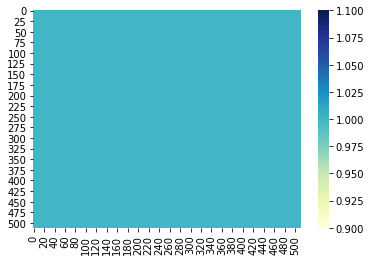

 **  timestep n = 575


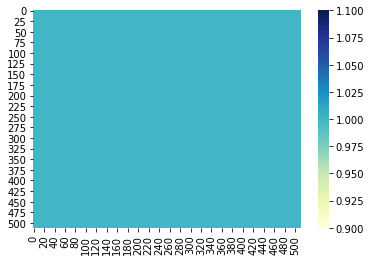

 **  timestep n = 600


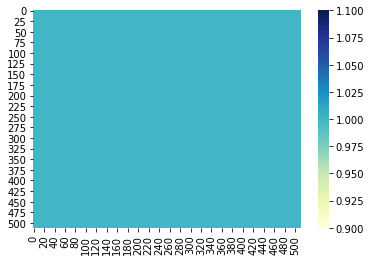

 **  timestep n = 625


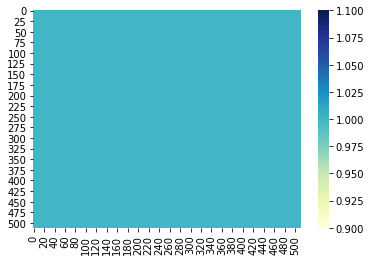

 **  timestep n = 650


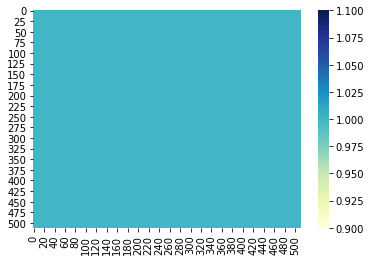

 **  timestep n = 675


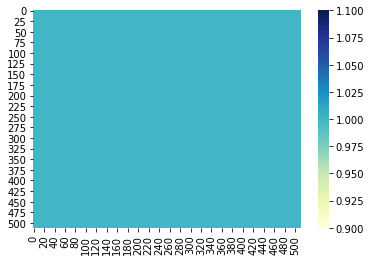

 **  timestep n = 700


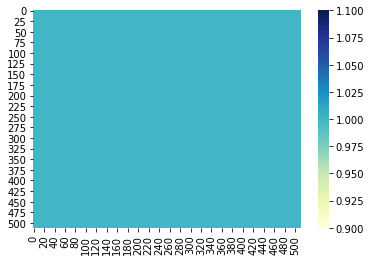

 **  timestep n = 725


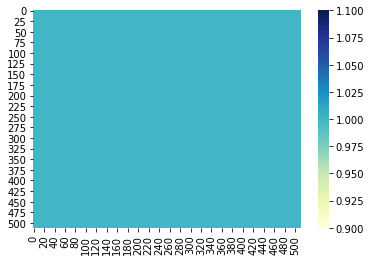

 **  timestep n = 750


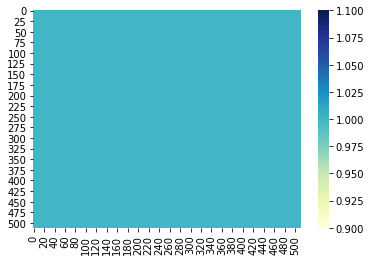

 **  timestep n = 775


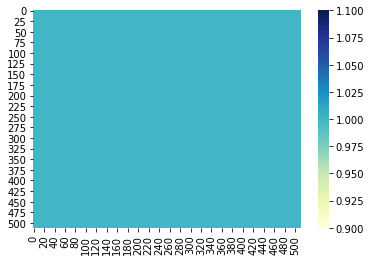

 **  timestep n = 800


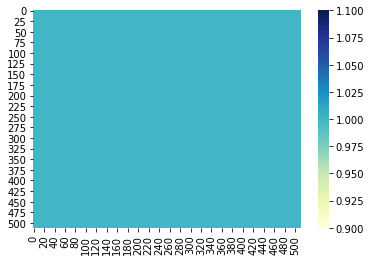

 **  timestep n = 825


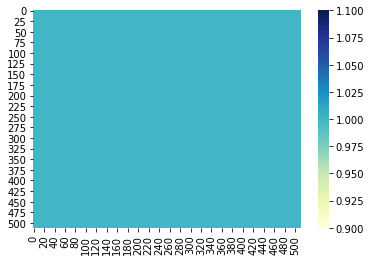

 **  timestep n = 850


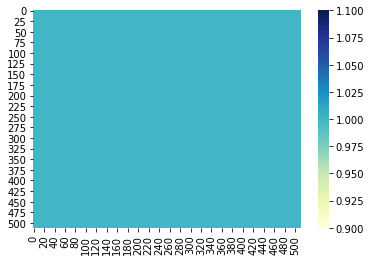

 **  timestep n = 875


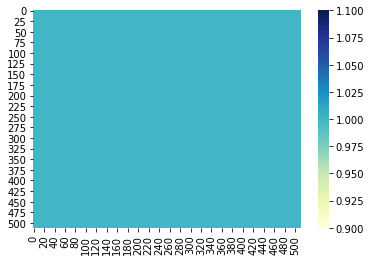

 **  timestep n = 900


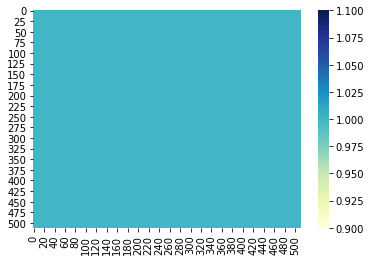

 **  timestep n = 925


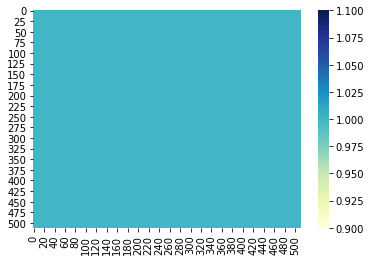

 **  timestep n = 950


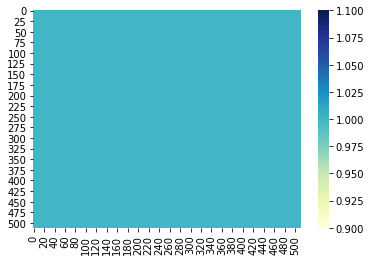

 **  timestep n = 975
elapsed time is 32.18475937843323


In [4]:
t1 = time.time()
# loop no tempo 
for n in range(nt):
    u_prev = u_val.copy()
    u_val = u_next.copy()
    # u_next[i,j] = 2 * u_prev[i,j] - u_next[i,j] + (dt * dt * c * c * (
       # ((u_prev[i+1,j] - 2 * u_prev[i,j] + u_prev[i-1,j])/(dx * dx))+
       # ((u_prev[i,j+1] - 2 * u_prev[i,j] + u_prev[i,j-1])/(dy * dy)))
       # )
    u_next[1:nx-1,1:ny-1] = 2 * u_val[1:nx-1,1:ny-1] - u_prev[1:nx-1,1:ny-1] + (dt * dt * c * c * (
        ((u_val[2:nx  ,1:ny-1] - 2 * u_val[1:nx-1,1:ny-1] + u_val[0:nx-2,1:ny-1])/(dx * dx))+
        ((u_val[1:nx-1,2:ny  ] - 2 * u_val[1:nx-1,1:ny-1] + u_val[1:nx-1,0:ny-2])/(dy * dy)))
        )
    if (n % print_every)==0:
        ax = sns.heatmap(u_next, cmap="YlGnBu")
        plt.show()
        #fig = pyplot.figure(figsize=(11, 7), dpi=100)
        #ax = fig.gca(projection='3d')
        #X, Y = numpy.meshgrid(x, y)
        print(' **  timestep n = '+str(n))
        #surf = ax.plot_surface(X, Y, u_next[:], cmap=cm.viridis)
        
print('elapsed time is '+str(time.time()-t1))



